# Internship Task 1

Step1 - Import All  Libraries and Data

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    
    

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Step 2- Visualizing The Dataset**

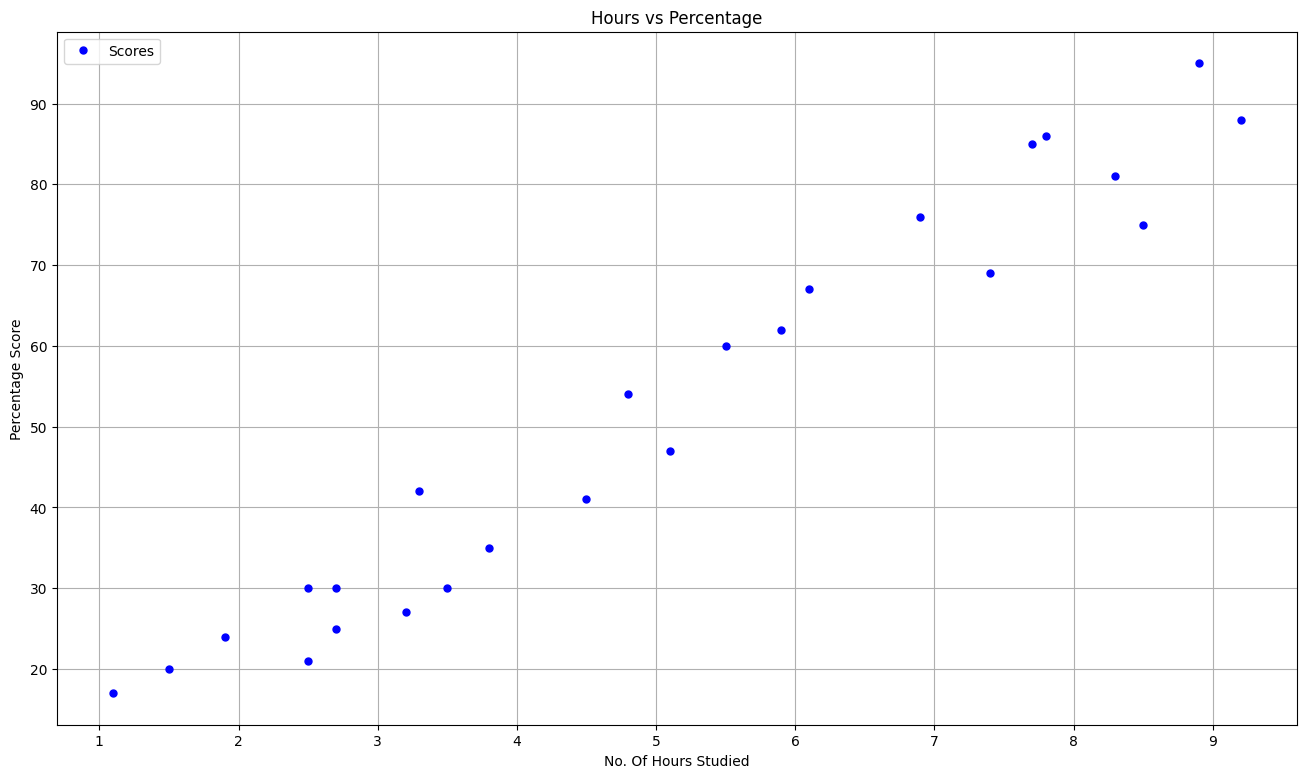

In [10]:
#plotting The dataset
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x="Hours",y="Scores",style=".",color='Blue',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('No. Of Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()



In [11]:
#To determine Corelation Between The Variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Step 3- Data Prepration**

In [12]:
# Using iloc FUnction We will divide the data in x and y
x=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [20]:
#Splitting Data into Training and Testing Data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 


**Step 4 - Trainnng The Algorithm**

In [22]:
# Now We have to Train Our Model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

print("Training completed.")

Training completed.


**Step 5- Visualizing The Model**

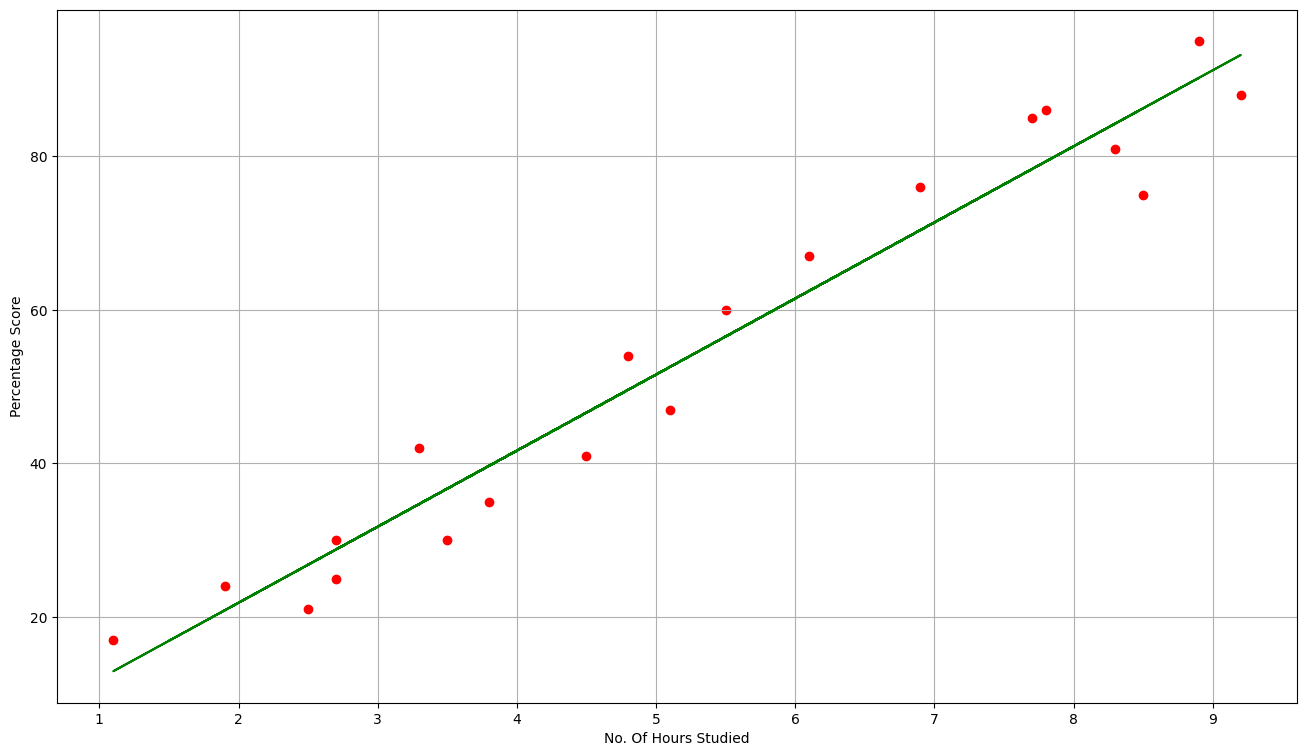

In [24]:
line=model.coef_*x + model.intercept_
#Plotting for the Training Data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train,y_train,color='Red')
plt.plot(x,line, color='Green')
plt.xlabel('No. Of Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()



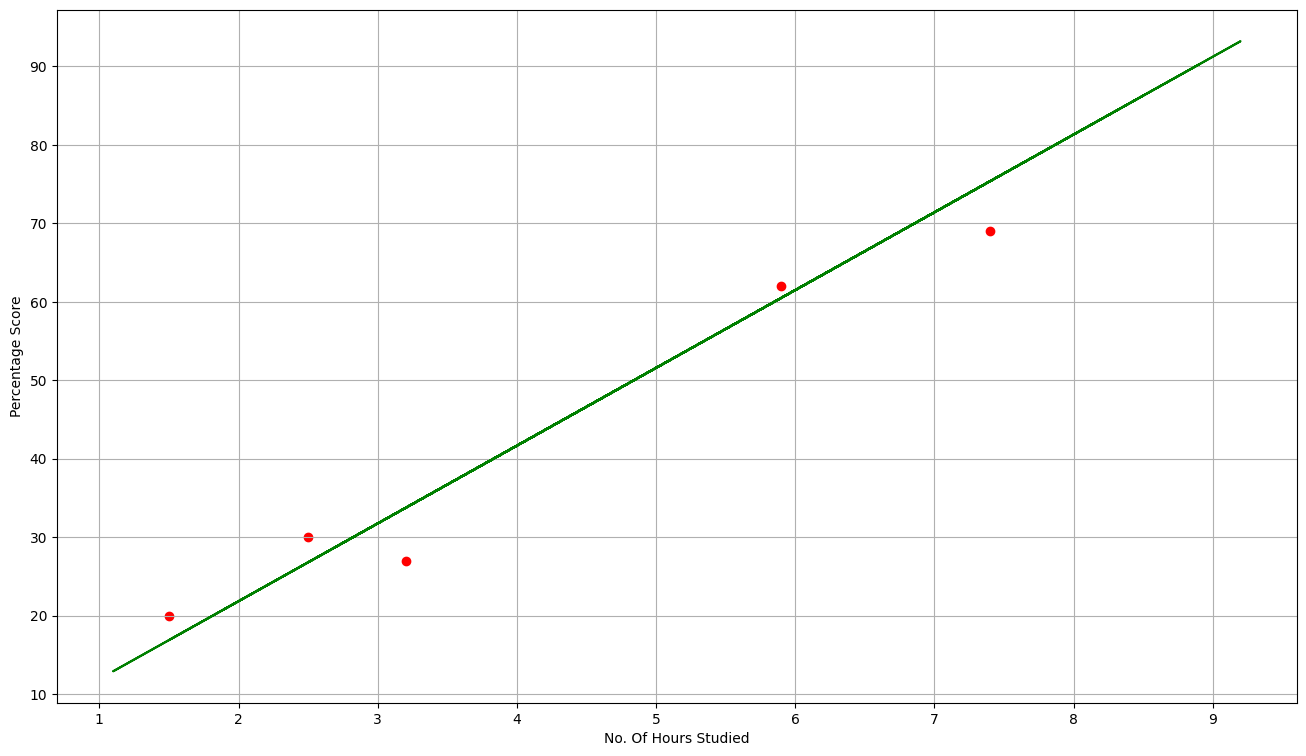

In [25]:
line=model.coef_*x + model.intercept_
#Plotting for the Testing Data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test,y_test,color='Red')
plt.plot(x,line, color='Green')
plt.xlabel('No. Of Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


**Step6- Making Prediction**

In [27]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
#Comparing Actual Vs Predicted
y_test


array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [29]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [31]:
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})  
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [34]:
# You can also predict with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format([hours]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = [93.69173249]


**Step 7- Evaluating The Model**

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
